In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

art = pd.read_csv("data/articles_processed.csv")                 # 상품 메타데이터
cust = pd.read_csv("data/customer_processed.csv")               # 고객 메타데이터
total_revenue = pd.read_csv("data/total_revenue.csv")       # 매출 데이터

In [4]:
# ---------------------------------------------------------------------
# 분석용 통합 테이블 거래+고객+상품
# 볼수 있는 데이터
# ==  거래(매출, 채널, 날짜, 고객그룹) + 고객속성 + 상품속성
# 가입한 사람이 아닌 소비한 고객을 골라야 하기 때문에 inner 사용
# ---------------------------------------------------------------------

analysis_master = (
    total_revenue
    .merge(cust, on="Customer_Id", how="inner")
    .merge(art, on="Article_Id", how="inner")
)
analysis_master.shape

(804149, 27)

In [5]:
pd.set_option('display.max_columns', None)  # 모든 컬럼이 다 보일 수 있도록 확장
analysis_master.head()

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,Fn,Active,Club_Member_Status,Fashion_News_Frequency,Age,Age_Group,Product_Code,Prod_Name,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,True,True,Active,Regularly,51,50s,698328,ZEBRA CF TVP,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005)
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,5,2019-05,05-22,0.067746,middle,False,False,Active,NaN,28,20s,760597,BUBBLE WRAP TOP,Top (254),Garment Upper body,Stripe (1010017),White (9),Jersey (1660),Ladieswear (A),Ladieswear (1),Womens Casual (6),Jersey Fancy (1005)
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,5,2019-05,05-10,0.016932,bottom_20,True,True,Active,Regularly,37,30s,488561,Teddy jogger.,Shorts (274),Garment Lower body,Chambray (1010024),Blue (2),Shorts (5658),Menswear (F),Menswear (3),Contemporary Casual (21),Shorts (1025)
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,8,2019-08,08-26,0.033881,middle,False,False,Active,NaN,19,10s,682771,Yuki shopper,Bag (66),Accessories,Solid (1010016),Black (5),Bags (3209),Ladies Accessories (C),Ladieswear (1),Womens Big accessories (65),Accessories (1019)
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,8,2019-08,08-10,0.028627,middle,False,False,Active,NaN,35,30s,742400,1pk Sportsock,Socks (302),Socks & Tights,All over pattern (1010001),White (9),Socks Wall (5999),Menswear (F),Menswear (3),Men Underwear (26),Socks and Tights (1021)


### 2019년 H&M의 판매량은 어떤 고객군이 어떤 채널과 어떤 상품을 통해 만들어내고 있을까?
### **→ 2019년 H&M 판매량 데이터 기반 고객/상품 구매 패턴 분석**

### 사용 테이블
- articles
- customer
- transactions  
> inner join 분석

### 주요 사용 컬럼
- Customer_Id
- Sales_Channel_Id
- Age
- Age_Group
- Product_Type_Info
- Perceived_Colour_Master_Info

## 시각화

In [6]:
df = analysis_master.copy()

In [7]:
# 값을 한글로 변경
df['Sales_Channel_Id'] = df['Sales_Channel_Id'].replace({1: '오프라인', 2: '온라인'})
df['Age_Group'] = df['Age_Group'].replace({'10s': '10대', '20s': '20대', '30s': '30대', '40s': '40대', '50s': '50대', '60s+': '60대+'})

### 채널별 판매량 비교

In [8]:
# 채널별 판매량 데이터프레임 생성
channel_cnt = df.groupby('Sales_Channel_Id').size().reset_index(name='Purchase_Cnt')

(0.0, 613312.7000000001)

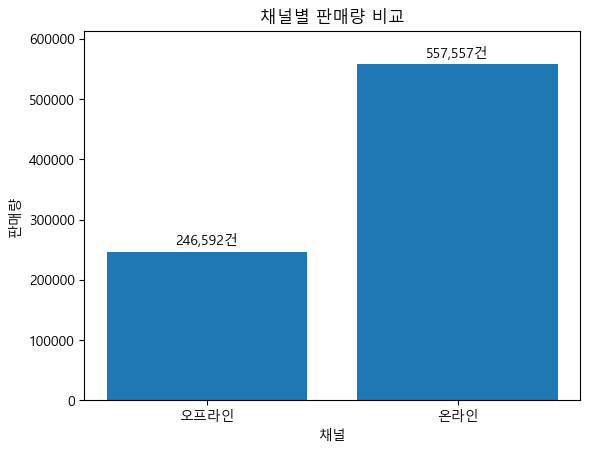

In [9]:
bars = plt.bar(channel_cnt['Sales_Channel_Id'], channel_cnt['Purchase_Cnt'])

# 각 막대의 높이 값(v)을 가져와서 '숫자+건' 형태의 리스트 생성
labels = [f'{int(v):,}건' for v in channel_cnt['Purchase_Cnt']]

# labels 인자에 위에서 만든 리스트를 전달
plt.bar_label(bars, labels=labels, padding=3, fontsize=10)

plt.title("채널별 판매량 비교")
plt.xlabel("채널")
plt.ylabel("판매량")

# y축 범위를 살짝 높여서 라벨이 잘리지 않게 조정
plt.ylim(0, channel_cnt['Purchase_Cnt'].max() * 1.1)


#### PPT 제작 목적 그래프 색상 변경

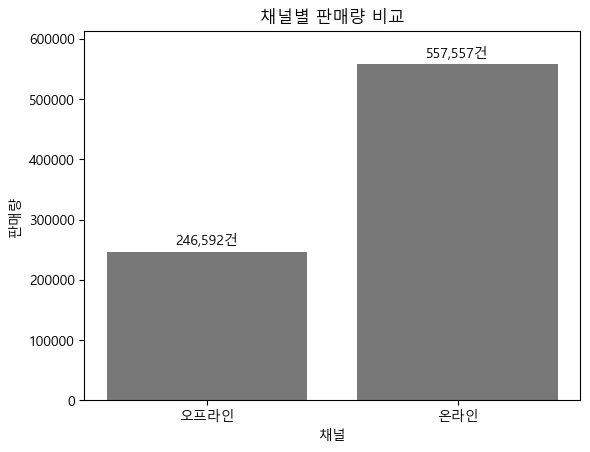

In [10]:
# 모든 막대를 기본 회색(#787878)으로 설정
bars = plt.bar(channel_cnt['Sales_Channel_Id'], channel_cnt['Purchase_Cnt'], color='#787878')

# 최댓값이 있는 인덱스 찾기 (channel_cnt 데이터 기준)
# 데이터가 정렬되어 있지 않아 argmax()를 활용: argmax는 데이터 중 가장 큰 값이 있는 순번 반환
import numpy as np
max_idx = np.argmax(channel_cnt['Purchase_Cnt'])

# 각 막대의 높이값(v)을 가져와서 '숫자+건' 형태의 리스트 생성
labels = [f'{int(v):,}건' for v in channel_cnt['Purchase_Cnt']]

# labels 인자에 위에서 만든 리스트를 전달
plt.bar_label(bars, labels=labels, padding=3, fontsize=10)

plt.title("채널별 판매량 비교")
plt.xlabel("채널")
plt.ylabel("판매량")
plt.ylim(0, channel_cnt['Purchase_Cnt'].max() * 1.1)

plt.show()

### 연령대별 판매량 비교

In [11]:
# 연령대별 판매량 데이터프레임 생성
age_cnt = df.groupby('Age_Group').size().reset_index(name='Purchase_Cnt')

(0.0, 400000.0)

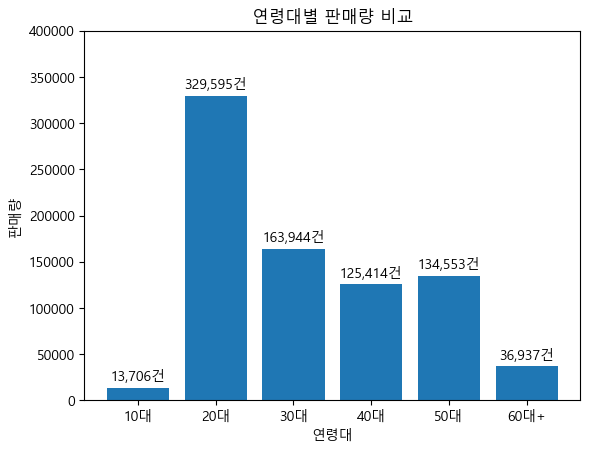

In [12]:
bars = plt.bar(age_cnt['Age_Group'], age_cnt['Purchase_Cnt'])

# 각 막대의 높이값(v)을 가져와서 '숫자+건' 형태의 리스트 생성
labels = [f'{int(v):,}건' for v in age_cnt['Purchase_Cnt']]

# labels 인자에 위에서 만든 리스트를 전달
plt.bar_label(bars, labels=labels, padding=3, fontsize=10)

plt.title("연령대별 판매량 비교")
plt.xlabel("연령대")
plt.ylabel("판매량")

# y축 범위를 살짝 높여서 라벨이 잘리지 않게 조정
plt.ylim(0, 400000)

#### PPT 제작 목적 그래프 색상 변경

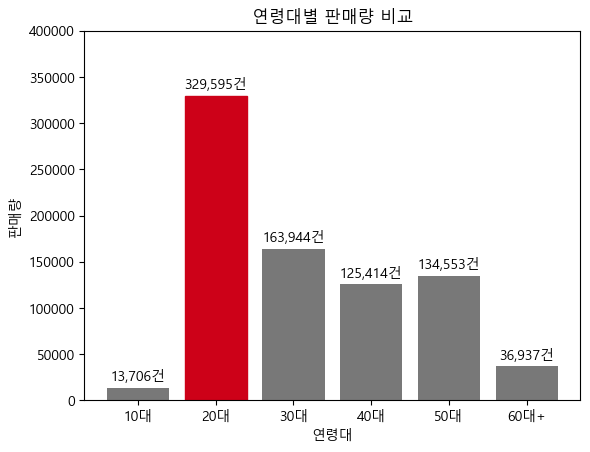

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 모든 막대를 기본 회색(#787878)으로 설정
bars = plt.bar(age_cnt['Age_Group'], age_cnt["Purchase_Cnt"], color='#787878')

# 최댓값이 있는 인덱스 찾기 (age_cnt 데이터 기준)
# 데이터가 정렬되어 있지 않아 argmax()를 활용: argmax는 데이터 중 가장 큰 값이 있는 순번 반환
max_idx = np.argmax(age_cnt['Purchase_Cnt'])

# 1등 막대만 강조 색상(#cd0118)으로 변경
bars[max_idx].set_color('#cd0118')

# 각 막대의 높이값(v)을 가져와서 '숫자+건' 형태의 리스트 생성
labels = [f'{int(v):,}건' for v in age_cnt['Purchase_Cnt']]

# labels 인자에 위에서 만든 리스트를 전달
plt.bar_label(bars, labels=labels, padding=3, fontsize=10)

plt.title("연령대별 판매량 비교")
plt.xlabel("연령대")
plt.ylabel("판매량")
plt.ylim(0, 400000)

plt.show()

### 채널 - 연령대 판매량

In [14]:
# 채널 - 연령대별 판매량 데이터프레임 생성
age_channel_cnt = df.groupby(['Age_Group', 'Sales_Channel_Id']).size().reset_index(name='Purchase_Cnt')

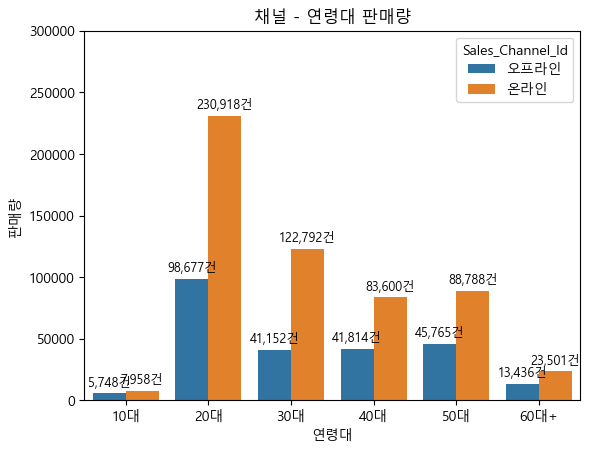

In [15]:
# 그래프 그리기 (ax 객체로 받기)
ax = sns.barplot(data=age_channel_cnt, x='Age_Group', y='Purchase_Cnt', hue='Sales_Channel_Id')

# 각 막대 묶음(container)을 돌면서 라벨 붙이기
for container in ax.containers:
    # 각 막대의 높이값(datavalue)을 가져와서 직접 '숫자+건' 포맷팅
    ax.bar_label(container, 
                 fmt=lambda x: f'{int(x):,}건' if x > 0 else '', 
                 padding=3, 
                 fontsize=9)

plt.title("채널 - 연령대 판매량")
plt.xlabel("연령대")
plt.ylabel("판매량")
plt.ylim(0, 300000)
plt.show()

#### PPT 제작 목적 그래프 색상 변경

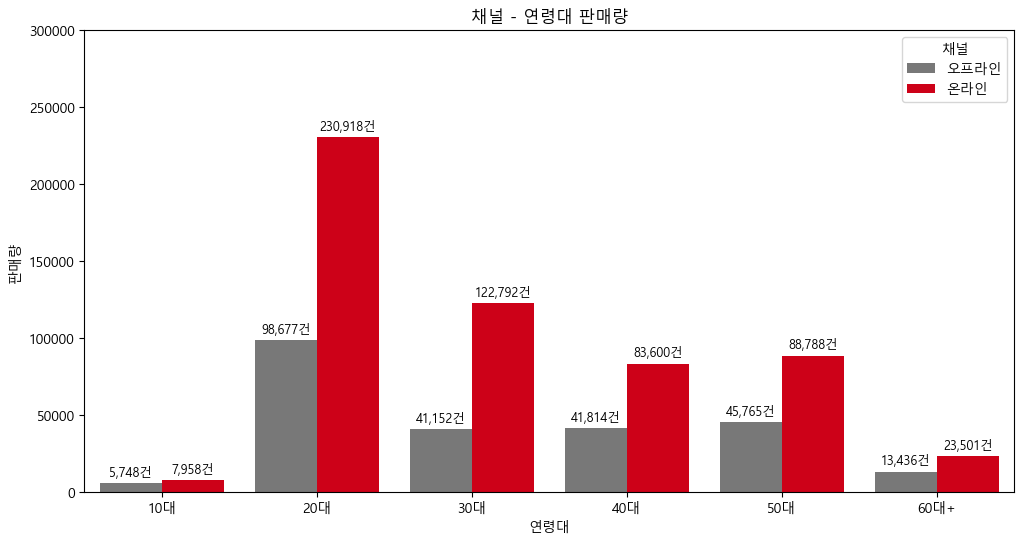

In [16]:
# 채널별 색상 매핑 (온라인: 빨강, 오프라인: 회색)
palette_colors = {
    '온라인': '#cd0118', 
    '오프라인': '#787878'
}

# 그래프 그리기 (palette 설정 추가)
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=age_channel_cnt, 
    x='Age_Group', 
    y='Purchase_Cnt', 
    hue='Sales_Channel_Id',
    palette=palette_colors,  # 설정한 색상 적용
    saturation=1  # Seaborn은 기본적으로 saturation 값을 0.75로 설정해두어 plt와 차이가 나서 수정 
)

# 각 막대 묶음에 라벨 붙이기
for container in ax.containers:
    ax.bar_label(
        container, 
        fmt=lambda x: f'{int(x):,}건' if x > 0 else '', 
        padding=3, 
        fontsize=9
    )

plt.title("채널 - 연령대 판매량")
plt.xlabel("연령대")
plt.ylabel("판매량")
plt.ylim(0, 300000)
plt.legend(title="채널") # 범례 표시

plt.show()

#### **H&M의 판매량은 20–30대 연령층, 특히 온라인 채널에 강하게 집중되어 있다.**

### 상품군별 판매량 TOP 10

In [17]:
# 상품군별 판매량 데이터프레임 생성(내림차순, 상위 10개만)
product_cnt = df.groupby('Product_Type_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
product_cnt

,Product_Type_Info,Purchase_Cnt
97,Trousers (272),105465
25,Dress (265),80749
87,Sweater (252),70385
92,T-shirt (255),56036
95,Top (254),41753
9,Blouse (258),40494
107,Vest top (253),37281
76,Shorts (274),32993
13,Bra (306),31788
89,Swimwear bottom (59),30166


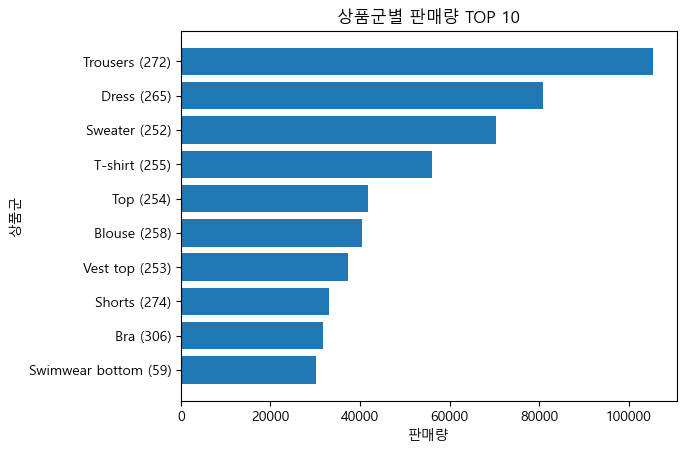

In [18]:
plt.barh(product_cnt['Product_Type_Info'], product_cnt['Purchase_Cnt'])  # barh == bar horizontal(가로 막대그래프)
plt.gca().invert_yaxis()  # 데이터프레임의 상단에 있는 데이터가 그래프의 맨 위에 오게 하도록 순서 뒤집기

plt.title("상품군별 판매량 TOP 10")
plt.xlabel("판매량")
plt.ylabel("상품군")
plt.show()

### 상품군 - 연령대 판매량

In [19]:
# 상품군 - 연령대별 판매량 데이터프레임 생성
product_age_cnt = df.groupby(['Product_Type_Info', 'Age_Group']).size().reset_index(name='Purchase_Cnt')

In [20]:
# 판매량 TOP 10에 속하는 상품군 리스트 생성
top_products = product_cnt['Product_Type_Info'].tolist()

# 판매량 TOP 10 상품군만 필터링
product_age_cnt_top = product_age_cnt[product_age_cnt['Product_Type_Info'].isin(top_products)]

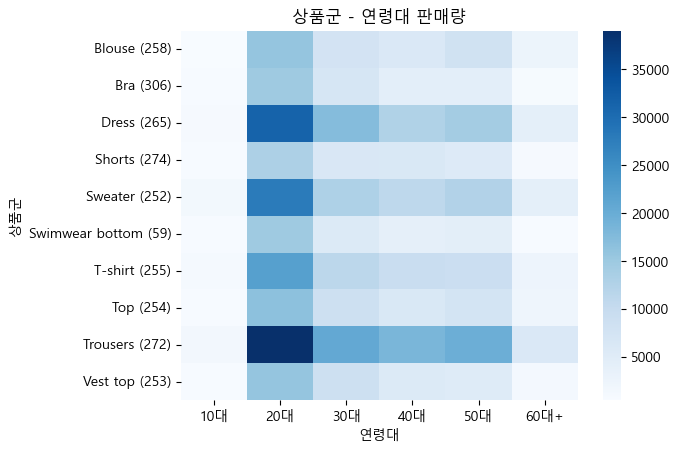

In [21]:
# 판매량 TOP 10 상품군 - 연령대 피벗테이블 생성
pivot_1 = product_age_cnt_top.pivot(index='Product_Type_Info', columns='Age_Group', values='Purchase_Cnt')

sns.heatmap(pivot_1, cmap="Blues")
plt.title("상품군 - 연령대 판매량")
plt.xlabel("연령대")
plt.ylabel("상품군")
plt.show()


### 연령대별 1인당 평균 구매 건수

In [22]:
# 연령대별 고객 수 데이터프레임 생성
age_customer_cnt = df.groupby('Age_Group')['Customer_Id'].nunique()

# 연령대별 구매 건수 데이터프레임 생성
age_purchase_cnt = df.groupby('Age_Group').size()

# 연령대별 1인당 평균 구매 건수 데이터프레임 생성 (연령대별 구매 건수 / 연령대별 고객수) 
age_frequency = (age_purchase_cnt / age_customer_cnt).reset_index()
age_frequency.columns = ['Age_Group', 'Avg_Purchase_Per_Customer']

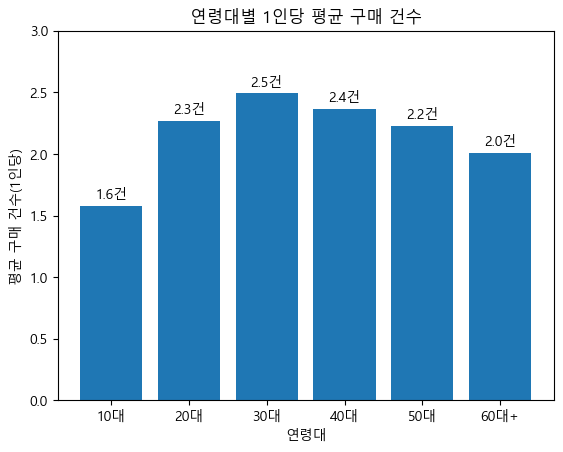

In [23]:
bars = plt.bar(age_frequency['Age_Group'], age_frequency['Avg_Purchase_Per_Customer'])

# 데이터 라벨 추가 (labels 리스트 사용)
labels = [f'{v:,.1f}건' for v in age_frequency['Avg_Purchase_Per_Customer']]
plt.bar_label(bars, labels=labels, padding=3, fontsize=10)

plt.title("연령대별 1인당 평균 구매 건수")
plt.xlabel("연령대")
plt.ylabel("평균 구매 건수(1인당)")
plt.ylim(0, 3)
plt.show()


#### PPT 제작 목적 그래프 색상 변경

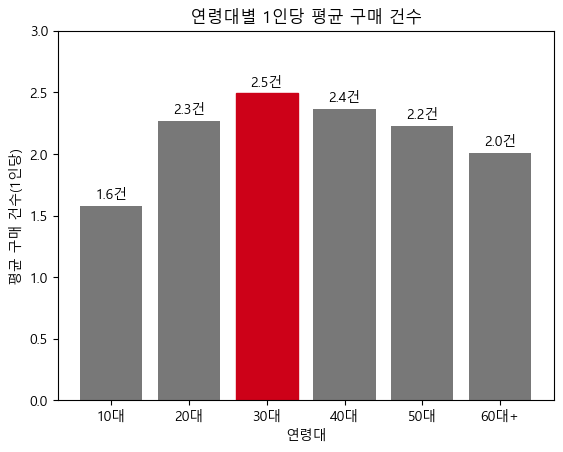

In [24]:
import matplotlib.pyplot as plt

# 모든 막대를 기본 회색(#787878)으로 그리기
bars = plt.bar(age_frequency['Age_Group'], age_frequency['Avg_Purchase_Per_Customer'], color='#787878')

# 최댓값이 있는 인덱스 찾기
max_idx = age_frequency['Avg_Purchase_Per_Customer'].idxmax()

# 1등 막대만 강조 색상(#cd0118)으로 변경
bars[max_idx].set_color('#cd0118')

# 데이터 라벨 추가 (labels 리스트 사용)
labels = [f'{v:,.1f}건' for v in age_frequency['Avg_Purchase_Per_Customer']]
plt.bar_label(bars, labels=labels, padding=3, fontsize=10)

plt.title("연령대별 1인당 평균 구매 건수")
plt.xlabel("연령대")
plt.ylabel("평균 구매 건수(1인당)")
plt.ylim(0, 3)

plt.show()

### 연령대별 구매 고객 수

In [25]:
# 연령대별 고객 수 데이터프레임 생성(Customer_Count로 명명)
age_customer_cnt = df.groupby('Age_Group')['Customer_Id'].nunique().reset_index(name='Customer_Count')

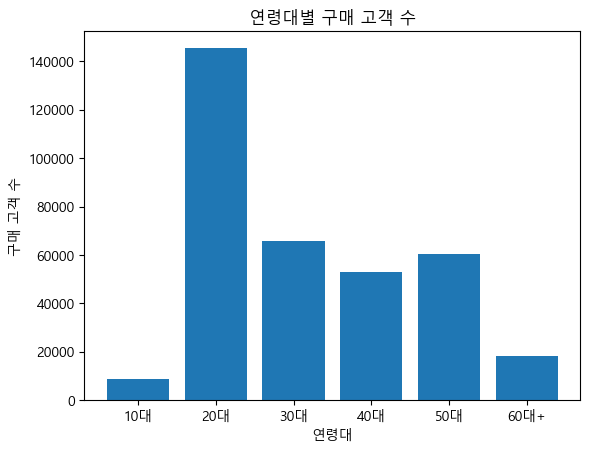

In [26]:
plt.bar(age_customer_cnt['Age_Group'], age_customer_cnt['Customer_Count'])

plt.title("연령대별 구매 고객 수")
plt.xlabel("연령대")
plt.ylabel("구매 고객 수")
plt.show()

#### **30대는 전체 구매 고객 수 2위이며, 1인당 평균 구매 건수도 가장 높게 나타나 20대와 함께 H&M의 판매량을 견인하는 핵심 고객층임을 알 수 있다.**

#### **2019년 H&M의 매출 구조는 20대의 두터운 고객층과 30대의 높은 구매 빈도가 주요하게 작용한 결과이다.**

--------------------

### 20대와 30대 각각의 연령대를 집중적으로 분석 (+ 4-50대도 하나의 그룹으로 묶어 대조군 분석)

In [27]:
# 20대, 30대 각각의 데이터프레임 생성
df_20 = df[df['Age_Group'] == '20대']
df_30 = df[df['Age_Group'] == '30대']

In [28]:
# 40대+50대 통합 데이터프레임 생성
df_4050 = df[df['Age_Group'].isin(['40대', '50대'])]

### 20대 색상 판매량 TOP 10

In [29]:
# 전연령 색상 판매량 TOP 10 데이터프레임 생성
color = df.groupby('Perceived_Colour_Master_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
color

,Perceived_Colour_Master_Info,Purchase_Cnt
1,Black (5),273981
2,Blue (2),111414
15,White (9),110474
0,Beige (11),51218
5,Grey (12),46190
12,Red (18),43761
11,Pink (4),35029
4,Green (19),22184
6,Khaki green (20),22049
16,Yellow (8),19759


In [30]:
# 20대 색상 판매량 TOP 10 데이터프레임 생성
color_20 = df_20.groupby('Perceived_Colour_Master_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
color_20

,Perceived_Colour_Master_Info,Purchase_Cnt
1,Black (5),116716
15,White (9),45130
2,Blue (2),41711
0,Beige (11),20547
12,Red (18),20094
5,Grey (12),16885
11,Pink (4),14431
4,Green (19),9021
16,Yellow (8),8703
6,Khaki green (20),8014


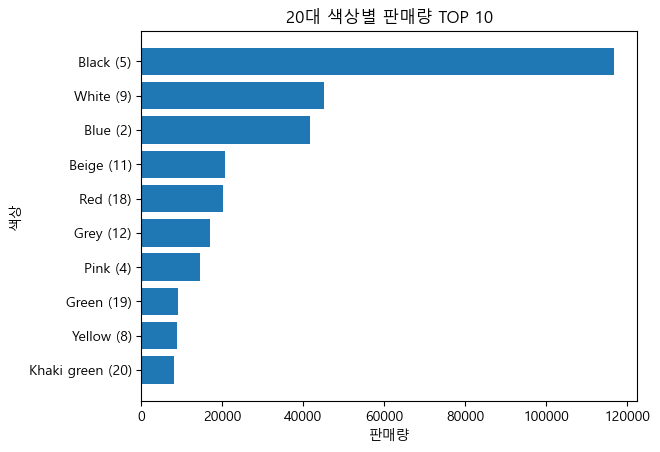

In [31]:
plt.barh(color_20['Perceived_Colour_Master_Info'], color_20['Purchase_Cnt'])  # barh == bar horizontal(가로 막대그래프)
plt.gca().invert_yaxis()  # 데이터프레임의 상단에 있는 데이터가 그래프의 맨 위에 오게 하도록 순서 뒤집기

plt.title("20대 색상별 판매량 TOP 10")
plt.xlabel("판매량")
plt.ylabel("색상")
plt.show()

### 30대 색상 판매량 TOP 10

In [32]:
# 30대 색상 판매량 TOP 10 데이터프레임 생성
color_30 = df_30.groupby('Perceived_Colour_Master_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
color_30

,Perceived_Colour_Master_Info,Purchase_Cnt
1,Black (5),55549
2,Blue (2),22354
15,White (9),21336
0,Beige (11),10500
5,Grey (12),9783
12,Red (18),8463
11,Pink (4),7870
4,Green (19),4853
6,Khaki green (20),4544
3,Brown (13),4120


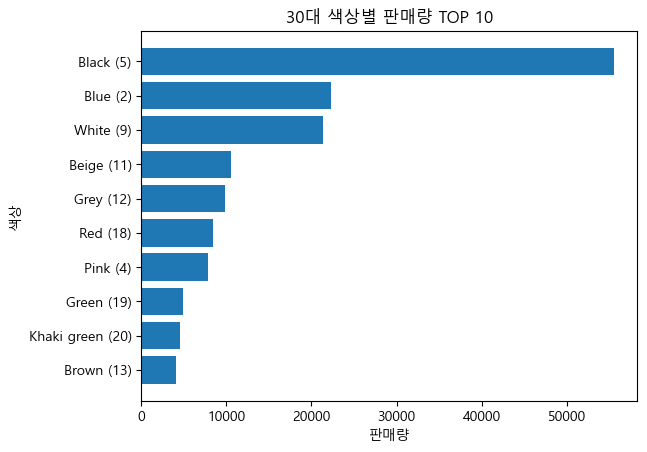

In [33]:
plt.barh(color_30['Perceived_Colour_Master_Info'], color_30['Purchase_Cnt'])  # barh == bar horizontal(가로 막대그래프)
plt.gca().invert_yaxis()  # 데이터프레임의 상단에 있는 데이터가 그래프의 맨 위에 오게 하도록 순서 뒤집기

plt.title("30대 색상별 판매량 TOP 10")
plt.xlabel("판매량")
plt.ylabel("색상")
plt.show()

### 대조군으로 40대 & 50대 분석

In [34]:
# 40대+50대 통합 색상 판매량 TOP 10 데이터프레임 생성
color_4050 = df_4050.groupby('Perceived_Colour_Master_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
color_4050

,Perceived_Colour_Master_Info,Purchase_Cnt
1,Black (5),86589
2,Blue (2),40054
15,White (9),36119
5,Grey (12),16433
0,Beige (11),16276
12,Red (18),12678
11,Pink (4),10614
6,Khaki green (20),7985
4,Green (19),6999
3,Brown (13),6167


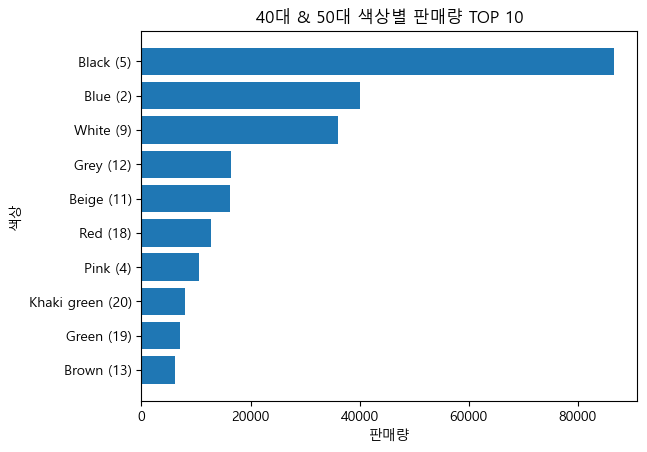

In [35]:
plt.barh(color_4050['Perceived_Colour_Master_Info'], color_4050['Purchase_Cnt'])  # barh == bar horizontal(가로 막대그래프)
plt.gca().invert_yaxis()  # 데이터프레임의 상단에 있는 데이터가 그래프의 맨 위에 오게 하도록 순서 뒤집기

plt.title("40대 & 50대 색상별 판매량 TOP 10")
plt.xlabel("판매량")
plt.ylabel("색상")
plt.show()

### 판매 건수 말고 비율로 보고 싶어서 다시 정리한 내용

In [36]:
# 각 연령대별 TOP 10 색상별 구매량 데이터프레임 생성
total_20 = color_20['Purchase_Cnt'].sum()
total_30 = color_30['Purchase_Cnt'].sum()
total_4050 = color_4050['Purchase_Cnt'].sum()

### 20대 색상별 판매 비중 TOP 10

In [37]:
# 20대의 TOP 10 색상별 판매 비중 데이터프레임 생성(판매 비중 = 20대 TOP 10 색상별 판매량 / 20대 전체 판매량 * 100)
color_20['Purchase_Ratio'] = color_20['Purchase_Cnt'] / total_20 * 100
top_color_20 = color_20.sort_values('Purchase_Ratio', ascending=False).head(10)

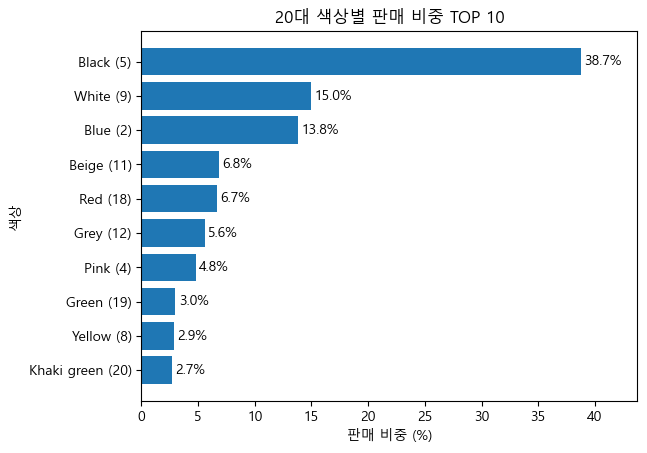

In [38]:
plt.barh(top_color_20['Perceived_Colour_Master_Info'], top_color_20['Purchase_Ratio'])  # barh == bar horizontal(가로 막대그래프)
plt.gca().invert_yaxis()  # 데이터프레임의 상단에 있는 데이터가 그래프의 맨 위에 오게 하도록 순서 뒤집기

for i, v in enumerate(top_color_20['Purchase_Ratio']):
    plt.text(
        v + 0.3,       # x 위치 (막대 끝보다 살짝 오른쪽)
        i,             # y 위치 (막대 인덱스)
        f"{v:.1f}%",   # 표시할 텍스트 (소수점 1자리 %)
        va="center"    # 세로 중앙 정렬
    )

plt.xlim(0, top_color_20['Purchase_Ratio'].max() + 5)   # 1위 라벨이 그래프 밖으로 나가서 x축 연장

plt.title("20대 색상별 판매 비중 TOP 10")
plt.xlabel("판매 비중 (%)")
plt.ylabel("색상")
plt.show()

### 30대 색상별 판매 비중 TOP 10

In [39]:
# 30대의 TOP 10 색상별 판매 비중 데이터프레임 생성(판매 비중 = 30대 TOP 10 색상별 판매량 / 30대 전체 판매량 * 100)
color_30['Purchase_Ratio'] = color_30['Purchase_Cnt'] / total_30 * 100
top_color_30 = color_30.sort_values('Purchase_Ratio', ascending=False).head(10)

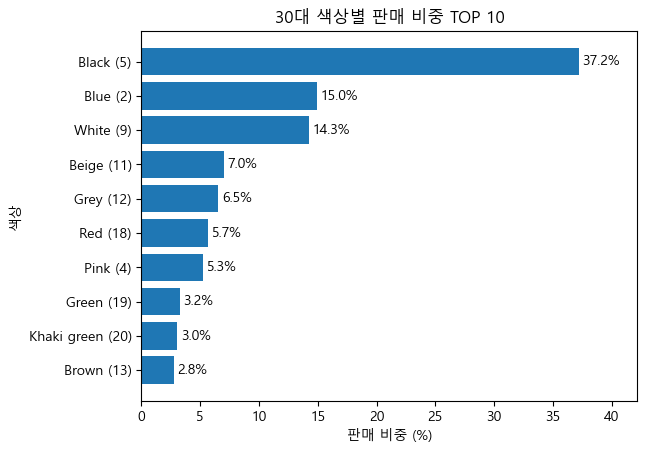

In [40]:
plt.barh(top_color_30['Perceived_Colour_Master_Info'], top_color_30['Purchase_Ratio'])  # barh == bar horizontal(가로 막대그래프)
plt.gca().invert_yaxis()  # 데이터프레임의 상단에 있는 데이터가 그래프의 맨 위에 오게 하도록 순서 뒤집기

for i, v in enumerate(top_color_30['Purchase_Ratio']):
    plt.text(
        v + 0.3,       # x 위치 (막대 끝보다 살짝 오른쪽)
        i,             # y 위치 (막대 인덱스)
        f"{v:.1f}%",   # 표시할 텍스트 (소수점 1자리 %)
        va="center"    # 세로 중앙 정렬
    )
    
plt.xlim(0, top_color_30['Purchase_Ratio'].max() + 5)   # 1위 라벨이 그래프 밖으로 나가서 x축 연장

plt.title("30대 색상별 판매 비중 TOP 10")
plt.xlabel("판매 비중 (%)")
plt.ylabel("색상")
plt.show()

### 대조군으로 40대 & 50대 분석

In [41]:
# 40대+50대의 TOP 10 색상별 판매 비중 데이터프레임 생성(판매 비중 = 40대+50대 TOP 10 색상별 판매량 / 40대+50대 전체 판매량 * 100)
color_4050['Purchase_Ratio'] = color_4050['Purchase_Cnt'] / total_4050 * 100
top_color_4050 = color_4050.sort_values('Purchase_Ratio', ascending=False).head(10)

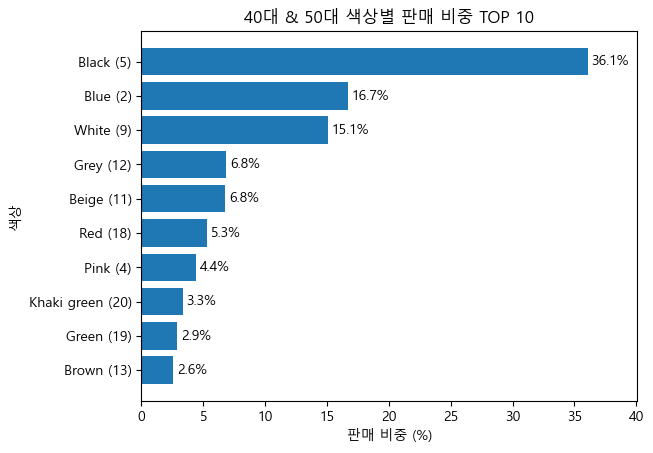

In [42]:
plt.barh(top_color_4050['Perceived_Colour_Master_Info'], top_color_4050['Purchase_Ratio'])  # barh == bar horizontal(가로 막대그래프)
plt.gca().invert_yaxis()  # 데이터프레임의 상단에 있는 데이터가 그래프의 맨 위에 오게 하도록 순서 뒤집기

for i, v in enumerate(top_color_4050['Purchase_Ratio']):
    plt.text(
        v + 0.3,       # x 위치 (막대 끝보다 살짝 오른쪽)
        i,             # y 위치 (막대 인덱스)
        f"{v:.1f}%",   # 표시할 텍스트 (소수점 1자리 %)
        va="center"    # 세로 중앙 정렬
    )
    
plt.xlim(0, top_color_4050['Purchase_Ratio'].max() + 4)   # 1위 라벨이 그래프 밖으로 나가서 x축 연장

plt.title("40대 & 50대 색상별 판매 비중 TOP 10")
plt.xlabel("판매 비중 (%)")
plt.ylabel("색상")
plt.show()

### 20대 상위 20%, 하위 20%의 평균 구매 건수

In [43]:
# 20대 고객별 구매 건수 데이터프레임 생성
customer_purchase_cnt_20 = df_20.groupby('Customer_Id').size().reset_index(name='Purchase_Cnt_20')

In [44]:
customer_purchase_cnt_20 = customer_purchase_cnt_20.sort_values('Purchase_Cnt_20', ascending=False).reset_index(drop=True)  # drop=True 해서 인덱스 번호 새로 매기기

In [45]:
# 상위 20%, 하위 20% 고객 나누기
n_customers_20 = len(customer_purchase_cnt_20)
top_20_20 = int(n_customers_20 * 0.2)
bottom_20_20 = int(n_customers_20 * 0.8)

In [46]:
customer_purchase_cnt_20['Purchase_Group_20'] = 'Middle'  # 먼저 전체 Middle로 하고 상위 20%, 하위 20% 태그 지정

customer_purchase_cnt_20.loc[customer_purchase_cnt_20.index < top_20_20, 'Purchase_Group_20'] = 'Top 20'

customer_purchase_cnt_20.loc[customer_purchase_cnt_20.index >= bottom_20_20, 'Purchase_Group_20'] = 'Bottom 20'

In [47]:
# 20대 구매 그룹별 평균 구매 건수 데이터프레임 생성
group_summary_20 = customer_purchase_cnt_20.groupby('Purchase_Group_20')['Purchase_Cnt_20'].mean().reset_index()
group_summary_20['Purchase_Cnt_20'] = group_summary_20['Purchase_Cnt_20'].round(2)
group_summary_20

,Purchase_Group_20,Purchase_Cnt_20
0,Bottom 20,1.00
1,Middle,1.65
2,Top 20,5.40


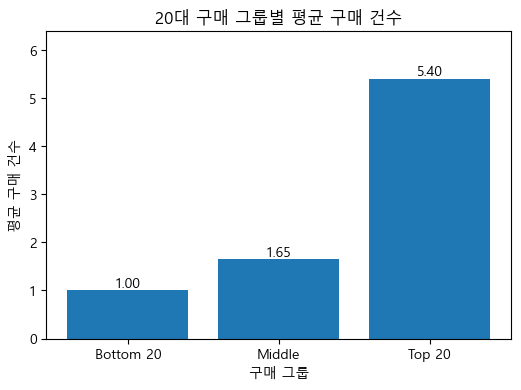

In [48]:
plt.figure(figsize=(6,4))

bars = plt.bar(group_summary_20['Purchase_Group_20'], group_summary_20['Purchase_Cnt_20'])

for bar in bars:                                   # 라벨링 부분
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )
    
plt.ylim(0, group_summary_20['Purchase_Cnt_20'].max() + 1)   # Top 20 라벨이 잘 보이도록 y축 연장

plt.title("20대 구매 그룹별 평균 구매 건수")
plt.xlabel("구매 그룹")
plt.ylabel("평균 구매 건수")

plt.show()


### 30대 상위 20%, 하위 20%의 평균 구매 건수

In [49]:
# 30대 고객별 구매 건수 데이터프레임 생성
customer_purchase_cnt_30 = df_30.groupby('Customer_Id').size().reset_index(name='Purchase_Cnt_30')
customer_purchase_cnt_30 = customer_purchase_cnt_30.sort_values('Purchase_Cnt_30', ascending=False).reset_index(drop=True)  # drop=True 해서 인덱스 번호 새로 매기기

In [50]:
# 상위 20%, 하위 20% 고객 나누기
n_customers_30 = len(customer_purchase_cnt_30)
top_20_30 = int(n_customers_30 * 0.2)
bottom_20_30 = int(n_customers_30 * 0.8)

In [51]:
customer_purchase_cnt_30['Purchase_Group_30'] = 'Middle'  # 먼저 전체 Middle로 하고 상위 20%, 하위 20% 태그 지정

customer_purchase_cnt_30.loc[customer_purchase_cnt_30.index < top_20_30, 'Purchase_Group_30'] = 'Top 20'

customer_purchase_cnt_30.loc[customer_purchase_cnt_30.index >= bottom_20_30, 'Purchase_Group_30'] = 'Bottom 20'

In [52]:
# 30대 구매 그룹별 평균 구매 건수 데이터프레임 생성
group_summary_30 = customer_purchase_cnt_30.groupby('Purchase_Group_30')['Purchase_Cnt_30'].mean().reset_index()
group_summary_30['Purchase_Cnt_30'] = group_summary_30['Purchase_Cnt_30'].round(2)
group_summary_30

,Purchase_Group_30,Purchase_Cnt_30
0,Bottom 20,1.00
1,Middle,1.77
2,Top 20,6.16


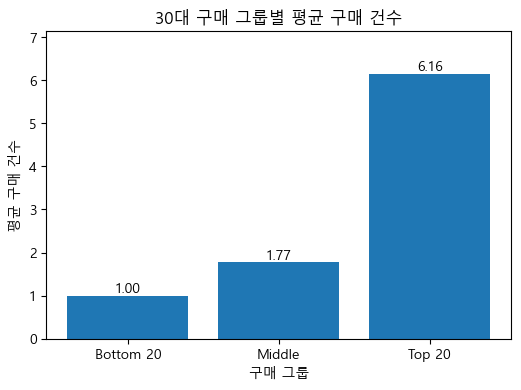

In [53]:
plt.figure(figsize=(6,4))

bars = plt.bar(group_summary_30['Purchase_Group_30'], group_summary_30['Purchase_Cnt_30'])

for bar in bars:                                   # 라벨링 부분
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )
    
plt.ylim(0, group_summary_30['Purchase_Cnt_30'].max() + 1)   # Top 20 라벨이 잘 보이도록 y축 연장

plt.title("30대 구매 그룹별 평균 구매 건수")
plt.xlabel("구매 그룹")
plt.ylabel("평균 구매 건수")

plt.show()


### 20대 상위 20%, 하위 20%의 선호 제품군

In [54]:
# df_20 테이블에 상위 20%, 하위 20%, Middle 태그 컬럼 붙이기
df_20 = df_20.merge(customer_purchase_cnt_20[['Customer_Id', 'Purchase_Group_20']], on='Customer_Id', how='left')

In [55]:
df_20.head()

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,Fn,Active,Club_Member_Status,Fashion_News_Frequency,Age,Age_Group,Product_Code,Prod_Name,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info,Purchase_Group_20
0,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,온라인,5,2019-05,05-22,0.067746,middle,False,False,Active,NaN,28,20대,760597,BUBBLE WRAP TOP,Top (254),Garment Upper body,Stripe (1010017),White (9),Jersey (1660),Ladieswear (A),Ladieswear (1),Womens Casual (6),Jersey Fancy (1005),Middle
1,2019-03-22,437d51082dc72fe41289783e165a2a2a6958ec7bd980b4...,559634009,0.033881,온라인,3,2019-03,03-22,0.033881,middle,False,False,Active,NaN,20,20대,559634,Timeless Padded Swimsuit,Swimsuit (57),Swimwear,Stripe (1010017),White (9),Swimwear (4242),Lingeries/Tights (B),Ladieswear (1),"Womens Swimwear, beachwear (60)",Swimwear (1018),Middle
2,2019-05-08,9d790a34fe05697c2af9c2456d9c2edadcdd42e54f0dda...,559634018,0.033881,온라인,5,2019-05,05-08,0.067746,middle,False,False,Active,NaN,22,20대,559634,Timeless Padded Swimsuit,Swimsuit (57),Swimwear,All over pattern (1010001),Beige (11),Swimwear (4242),Lingeries/Tights (B),Ladieswear (1),"Womens Swimwear, beachwear (60)",Swimwear (1018),Middle
3,2019-02-22,4c8c418805d81bd1d25d77659f227ac5570b154172ff8c...,651685004,0.016932,온라인,2,2019-02,02-22,0.016932,bottom_20,False,False,Active,NaN,26,20대,651685,Hazel playsuit,Trousers (272),Garment Lower body,All over pattern (1010001),Red (18),Trouser (1722),Ladieswear (A),Ladieswear (1),Womens Everyday Collection (15),Trousers (1009),Middle
4,2019-11-08,5e7680cc75a00c44a7cc3b507404319c4409b95c458741...,749400009,0.016932,온라인,11,2019-11,11-08,0.425237,top_20,False,False,Active,NaN,28,20대,749400,Tory price tee,T-shirt (255),Garment Upper body,Solid (1010016),Black (5),Ladies Sport Bras (8316),Sport (S),Sport (26),Ladies H&M Sport (5),Jersey Fancy (1005),Top 20


In [56]:
# 20대 상위 20% 고객군의 선호 제품군 TOP 10 데이터프레임 생성
top_product_20 = df_20[df_20['Purchase_Group_20'] == 'Top 20'].groupby('Product_Type_Info').size().reset_index(name='Purchase_Cnt_20').sort_values('Purchase_Cnt_20', ascending=False).head(10)
top_product_20

,Product_Type_Info,Purchase_Cnt_20
90,Trousers (272),19365
23,Dress (265),16317
81,Sweater (252),13231
85,T-shirt (255),10270
88,Top (254),8218
8,Blouse (258),8212
100,Vest top (253),7581
83,Swimwear bottom (59),6652
6,Bikini top (298),6625
12,Bra (306),6582


In [57]:
# 20대 하위 20% 고객군의 선호 제품군 TOP 10 데이터프레임 생성
bottom_product_20 = df_20[df_20['Purchase_Group_20'] == 'Bottom 20'].groupby('Product_Type_Info').size().reset_index(name='Purchase_Cnt_20').sort_values('Purchase_Cnt_20', ascending=False).head(10)
bottom_product_20

,Product_Type_Info,Purchase_Cnt_20
81,Trousers (272),3293
72,Sweater (252),2527
22,Dress (265),2388
76,T-shirt (255),1991
12,Bra (306),1465
90,Vest top (253),1420
6,Bikini top (298),1420
74,Swimwear bottom (59),1351
79,Top (254),1340
86,Underwear bottom (286),1188


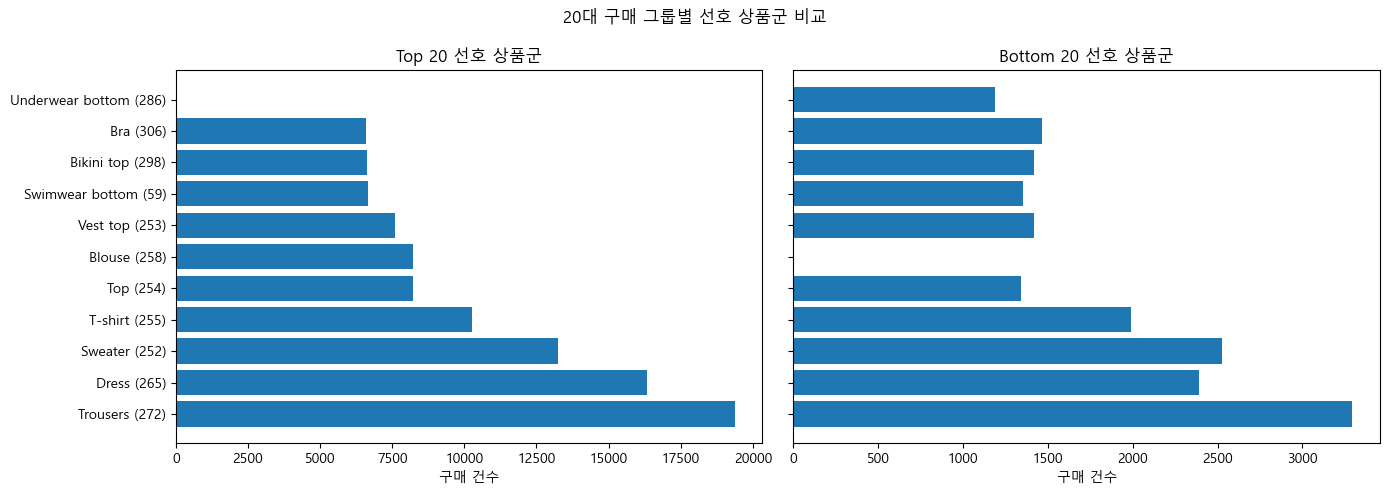

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Top 20
axes[0].barh(
    top_product_20['Product_Type_Info'],
    top_product_20['Purchase_Cnt_20']
)
axes[0].set_title("Top 20 선호 상품군")
axes[0].invert_yaxis()

# Bottom 20
axes[1].barh(
    bottom_product_20['Product_Type_Info'],
    bottom_product_20['Purchase_Cnt_20']
)
axes[1].set_title("Bottom 20 선호 상품군")
axes[1].invert_yaxis()

for ax in axes:
    ax.set_xlabel("구매 건수")

plt.suptitle("20대 구매 그룹별 선호 상품군 비교")
plt.tight_layout()
plt.show()


### 30대 상위 20%, 하위 20%의 선호 제품군

In [59]:
# df_30 테이블에 상위 20%, 하위 20%, Middle 태그 컬럼 붙이기
df_30 = df_30.merge(customer_purchase_cnt_30[['Customer_Id', 'Purchase_Group_30']], on='Customer_Id', how='left')

In [60]:
df_30.head()

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,Fn,Active,Club_Member_Status,Fashion_News_Frequency,Age,Age_Group,Product_Code,Prod_Name,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info,Purchase_Group_30
0,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,온라인,5,2019-05,05-10,0.016932,bottom_20,True,True,Active,Regularly,37,30대,488561,Teddy jogger.,Shorts (274),Garment Lower body,Chambray (1010024),Blue (2),Shorts (5658),Menswear (F),Menswear (3),Contemporary Casual (21),Shorts (1025),Bottom 20
1,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,오프라인,8,2019-08,08-10,0.028627,middle,False,False,Active,NaN,35,30대,742400,1pk Sportsock,Socks (302),Socks & Tights,All over pattern (1010001),White (9),Socks Wall (5999),Menswear (F),Menswear (3),Men Underwear (26),Socks and Tights (1021),Middle
2,2019-02-22,0e5b7fc9a02c8d44a86575a66b571587fa5178f0705c7b...,751941002,0.036000,온라인,2,2019-02,02-22,0.172373,top_20,False,False,Active,NaN,30,30대,751941,Bonita WH tapered,Trousers (272),Garment Lower body,Solid (1010016),Khaki green (20),Trouser (1722),Ladieswear (A),Ladieswear (1),Womens Everyday Collection (15),Trousers (1009),Top 20
3,2019-09-23,8a884dd696d606c86deedabbdeb01ab697bdb1c1c24d19...,554598003,0.016932,오프라인,9,2019-09,09-23,0.092237,top_20,False,False,Active,NaN,37,30대,554598,Nora T-shirt,T-shirt (255),Garment Upper body,Solid (1010016),White (9),Jersey Basic (1676),Ladieswear (A),Ladieswear (1),Womens Everyday Basics (16),Jersey Basic (1002),Top 20
4,2019-10-02,605973e6f719e722f056218dcea1ebd6b010a56a758143...,754751001,0.033881,온라인,10,2019-10,10-02,0.092576,top_20,True,True,Active,Regularly,37,30대,754751,Paris glove,Gloves (71),Accessories,Solid (1010016),Black (5),Gloves/Hats (3519),Ladies Accessories (C),Ladieswear (1),Womens Big accessories (65),Accessories (1019),Top 20


In [61]:
# 30대 상위 20% 고객군의 선호 제품군 TOP 10 데이터프레임 생성
top_product_30 = df_30[df_30['Purchase_Group_30'] == 'Top 20'].groupby('Product_Type_Info').size().reset_index(name='Purchase_Cnt_30').sort_values('Purchase_Cnt_30', ascending=False).head(10)
top_product_30

,Product_Type_Info,Purchase_Cnt_30
90,Trousers (272),10330
24,Dress (265),9153
81,Sweater (252),6608
85,T-shirt (255),5290
88,Top (254),4372
100,Vest top (253),4284
9,Blouse (258),4030
13,Bra (306),3226
70,Shorts (274),3135
83,Swimwear bottom (59),2681


In [62]:
# 30대 하위 20% 고객군의 선호 제품군 TOP 10 데이터프레임 생성
bottom_product_30 = df_30[df_30['Purchase_Group_30'] == 'Bottom 20'].groupby('Product_Type_Info').size().reset_index(name='Purchase_Cnt_30').sort_values('Purchase_Cnt_30', ascending=False).head(10)
bottom_product_30

,Product_Type_Info,Purchase_Cnt_30
80,Trousers (272),1683
21,Dress (265),1250
70,Sweater (252),1048
75,T-shirt (255),930
89,Vest top (253),681
78,Top (254),646
11,Bra (306),622
86,Underwear bottom (286),567
7,Blouse (258),547
63,Shorts (274),502


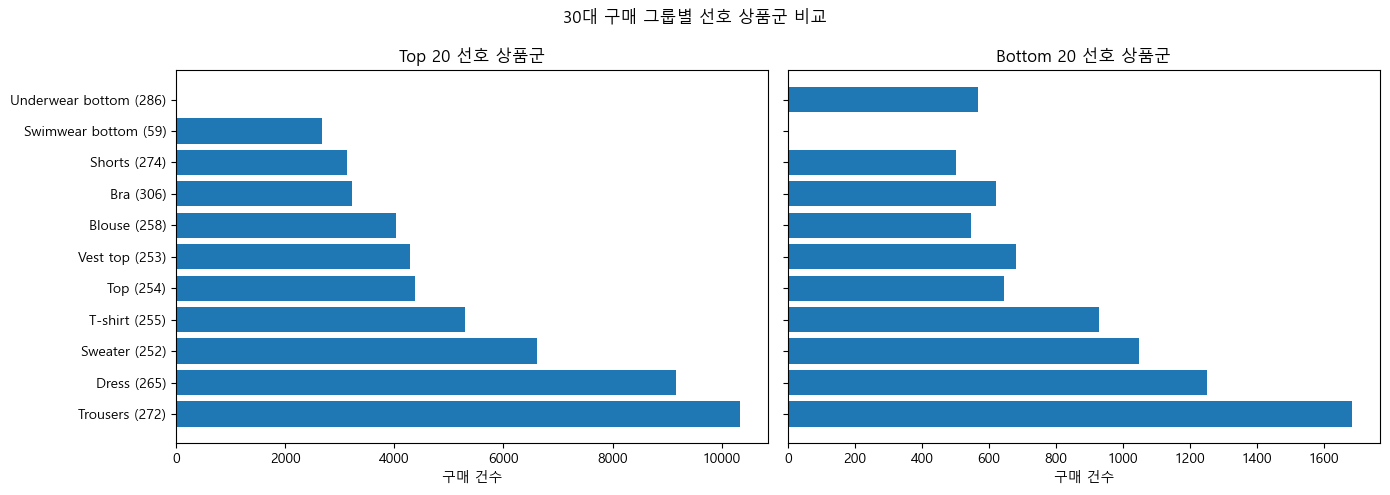

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Top 20
axes[0].barh(
    top_product_30['Product_Type_Info'],
    top_product_30['Purchase_Cnt_30']
)
axes[0].set_title("Top 20 선호 상품군")
axes[0].invert_yaxis()

# Bottom 20
axes[1].barh(
    bottom_product_30['Product_Type_Info'],
    bottom_product_30['Purchase_Cnt_30']
)
axes[1].set_title("Bottom 20 선호 상품군")
axes[1].invert_yaxis()

for ax in axes:
    ax.set_xlabel("구매 건수")

plt.suptitle("30대 구매 그룹별 선호 상품군 비교")
plt.tight_layout()
plt.show()


### 연령대별 Top 20 & Bottom 20 군집에 따른 구매 성향 분석 (상품군 다양성, 색상 다양성)

#### 20대

In [64]:
# 20대, 30대 고객별 상품군 데이터프레임 생성
product_diversity_20 = df_20.groupby('Customer_Id')['Product_Type_Info'].nunique().reset_index(name='Product_Type_Cnt_20')
product_diversity_30 = df_30.groupby('Customer_Id')['Product_Type_Info'].nunique().reset_index(name='Product_Type_Cnt_30')

In [65]:
# 20대, 30대 고객별 색상 데이터프레임 생성
color_diversity_20 = df_20.groupby('Customer_Id')['Perceived_Colour_Master_Info'].nunique().reset_index(name='Color_Cnt_20')
color_diversity_30 = df_30.groupby('Customer_Id')['Perceived_Colour_Master_Info'].nunique().reset_index(name='Color_Cnt_30')

In [66]:
# 20대 고객별 상품군, 색상 병합 데이터 프레임 생성
diversity_df_20 = customer_purchase_cnt_20.merge(product_diversity_20, on='Customer_Id').merge(color_diversity_20, on='Customer_Id')

In [67]:
diversity_df_20

,Customer_Id,Purchase_Cnt_20,Purchase_Group_20,Product_Type_Cnt_20,Color_Cnt_20
0,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,53,Top 20,20,16
1,689f4eda82fdf3d9bfe8e524bbd0d931c4d7690f2234d3...,42,Top 20,17,14
2,a76cf5ea515d09f22b7fe3e8ea3c1944316bd6264a90e2...,36,Top 20,20,11
3,1df07f916d7f648458702bd0b612caee88f1fb4cd1b660...,34,Top 20,11,12
4,9e52bb4ea6e22446b49c67be6fcdc5066897f89f7467f2...,34,Top 20,12,11
...,...,...,...,...,...
145342,c88438be0df2b155ebe7a38a302a62992c90781301703e...,1,Bottom 20,1,1
145343,00058592fc65afabbb00b1bb7d33c6b221d00c6a98c621...,1,Bottom 20,1,1
145344,c88da21c0372d82797be994be70f5f3fb3211d63b4d54b...,1,Bottom 20,1,1
145345,c88d8515e366c317ba7d3025b2faabca8a43821c276d66...,1,Bottom 20,1,1


In [68]:
# 20대 구매 그룹별(상위 20%, 하위 20%, Middle) 상품군, 색상 병합 데이터 프레임 생성
diversity_summary_20 = diversity_df_20.groupby('Purchase_Group_20')[['Product_Type_Cnt_20', 'Color_Cnt_20']].mean().round(2).reset_index()

In [69]:
diversity_summary_20

,Purchase_Group_20,Product_Type_Cnt_20,Color_Cnt_20
0,Bottom 20,1.00,1.00
1,Middle,1.55,1.48
2,Top 20,4.27,3.56


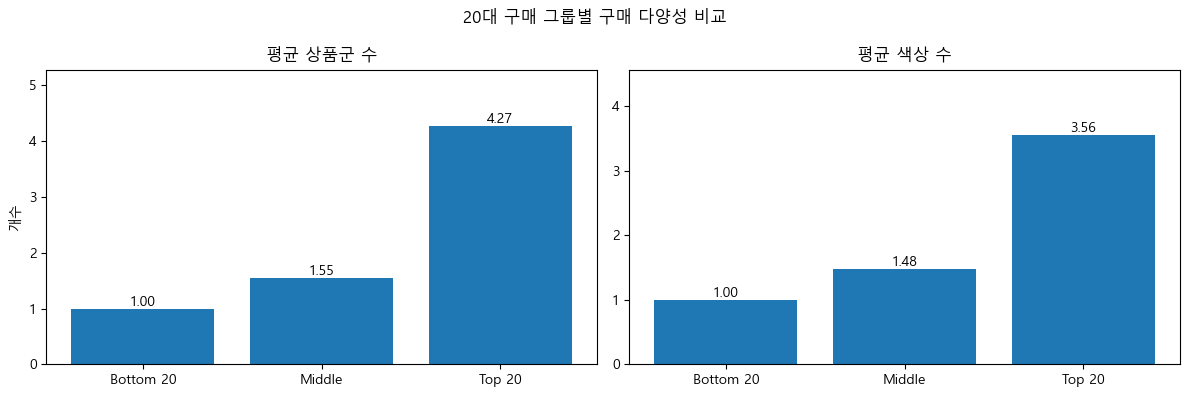

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=False)

# 상품군 수
axes[0].bar(diversity_summary_20['Purchase_Group_20'], diversity_summary_20['Product_Type_Cnt_20'])
axes[0].set_title("평균 상품군 수")
axes[0].set_ylabel("개수")

# 색상 수
axes[1].bar(diversity_summary_20['Purchase_Group_20'], diversity_summary_20['Color_Cnt_20'])
axes[1].set_title("평균 색상 수")

for ax, col in zip(axes, ['Product_Type_Cnt_20', 'Color_Cnt_20']):    # 그래프에 숫자 기입
    for i, v in enumerate(diversity_summary_20[col]):
        ax.text(i, v, f"{v:.2f}", ha="center", va="bottom")

axes[0].set_ylim(0, diversity_summary_20['Product_Type_Cnt_20'].max() + 1)   # y축 조정
axes[1].set_ylim(0, diversity_summary_20['Color_Cnt_20'].max() + 1)          # y축 조정

plt.suptitle("20대 구매 그룹별 구매 다양성 비교")
plt.tight_layout()
plt.show()


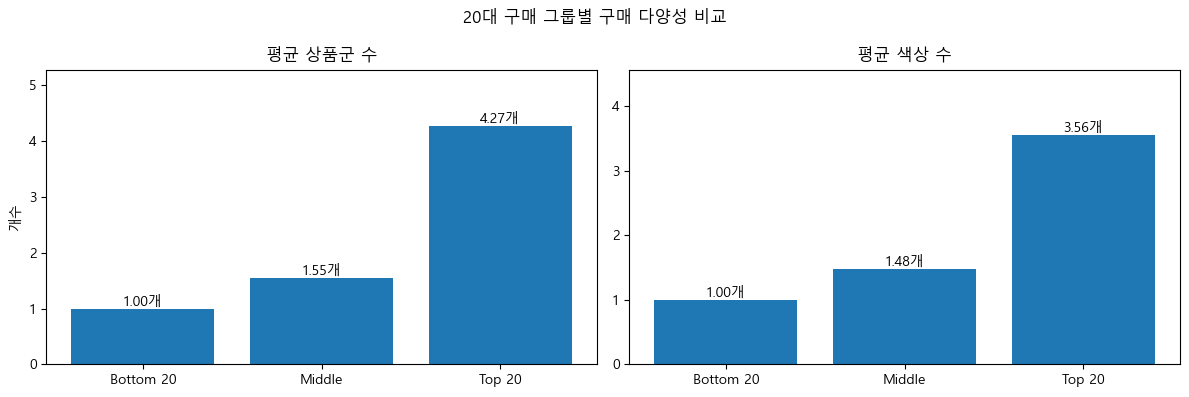

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

# 상품군 수 그래프
axes[0].bar(diversity_summary_20['Purchase_Group_20'], diversity_summary_20['Product_Type_Cnt_20'])
axes[0].set_title("평균 상품군 수")
axes[0].set_ylabel("개수")

# 색상 수 그래프
axes[1].bar(diversity_summary_20['Purchase_Group_20'], diversity_summary_20['Color_Cnt_20'])
axes[1].set_title("평균 색상 수")

# 공통 작업: 데이터 라벨에 '개' 추가
cols = ['Product_Type_Cnt_20', 'Color_Cnt_20']
for ax, col in zip(axes, cols):
    for i, v in enumerate(diversity_summary_20[col]):
        # f"{v:.2f}개" 로 수정하여 숫자 뒤에 단어 추가
        ax.text(i, v, f"{v:.2f}개", ha="center", va="bottom")

# y축 범위 조정
axes[0].set_ylim(0, diversity_summary_20['Product_Type_Cnt_20'].max() + 1)
axes[1].set_ylim(0, diversity_summary_20['Color_Cnt_20'].max() + 1)

plt.suptitle("20대 구매 그룹별 구매 다양성 비교")
plt.tight_layout()
plt.show()

#### 30대

In [72]:
# 30대 고객별 상품군, 색상 병합 데이터 프레임 생성
diversity_df_30 = customer_purchase_cnt_30.merge(product_diversity_30, on='Customer_Id').merge(color_diversity_30, on='Customer_Id')

In [73]:
diversity_df_30

,Customer_Id,Purchase_Cnt_30,Purchase_Group_30,Product_Type_Cnt_30,Color_Cnt_30
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,59,Top 20,19,11
1,3493c55a7fe252c84a9a03db338f5be7afbce1edbca12f...,46,Top 20,19,8
2,65d3fe53c1daab078c0f6b538cc85ee24f08aca9755291...,43,Top 20,15,11
3,a728b385ebbb4b2da7b5f5d4d945e411117462ac413c44...,40,Top 20,22,13
4,157eee38676eebb003bf97407f26e369de192997ab3902...,38,Top 20,18,11
...,...,...,...,...,...
65772,c886e18166b6416b5b733b96635b4a54c8baac7a0df8f5...,1,Bottom 20,1,1
65773,c885d492e260faaf93b883a934dadbab819ef76679bf2c...,1,Bottom 20,1,1
65774,c88326ee48d4853511e08ebd3adef0c257f81da6a35046...,1,Bottom 20,1,1
65775,c88207ce44213e455d165b209c7428eb9dbc8b7dd05577...,1,Bottom 20,1,1


In [74]:
# 30대 구매 그룹별(상위 20%, 하위 20%, Middle) 상품군, 색상 병합 데이터 프레임 생성
diversity_summary_30 = diversity_df_30.groupby('Purchase_Group_30')[['Product_Type_Cnt_30', 'Color_Cnt_30']].mean().round(2).reset_index()

In [75]:
diversity_summary_30

,Purchase_Group_30,Product_Type_Cnt_30,Color_Cnt_30
0,Bottom 20,1.00,1.00
1,Middle,1.64,1.57
2,Top 20,4.72,3.93


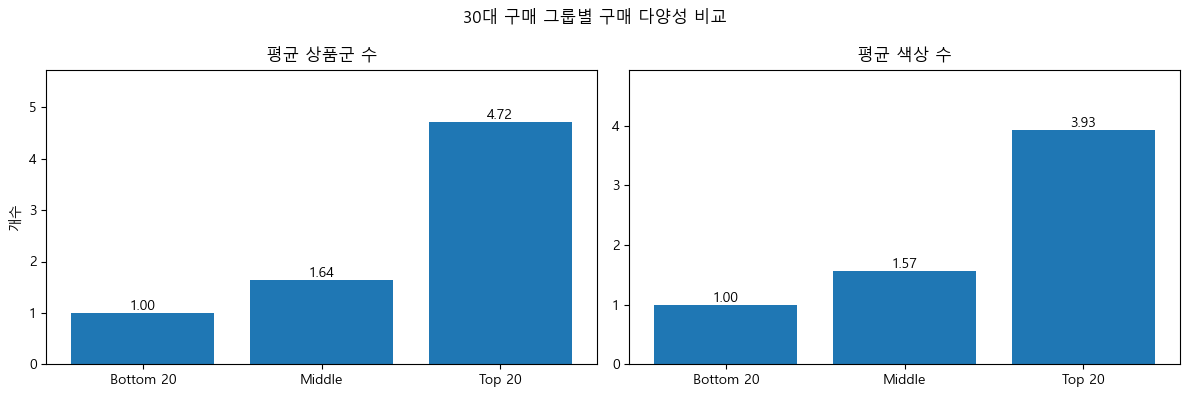

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=False)

# 상품군 수
axes[0].bar(diversity_summary_30['Purchase_Group_30'], diversity_summary_30['Product_Type_Cnt_30'])
axes[0].set_title("평균 상품군 수")
axes[0].set_ylabel("개수")

# 색상 수
axes[1].bar(diversity_summary_30['Purchase_Group_30'], diversity_summary_30['Color_Cnt_30'])
axes[1].set_title("평균 색상 수")

for ax, col in zip(axes, ['Product_Type_Cnt_30', 'Color_Cnt_30']):
    for i, v in enumerate(diversity_summary_30[col]):
        ax.text(i, v, f"{v:.2f}", ha="center", va="bottom")

axes[0].set_ylim(0, diversity_summary_30['Product_Type_Cnt_30'].max() + 1)   # y축 조정
axes[1].set_ylim(0, diversity_summary_30['Color_Cnt_30'].max() + 1)          # y축 조정

plt.suptitle("30대 구매 그룹별 구매 다양성 비교")
plt.tight_layout()
plt.show()


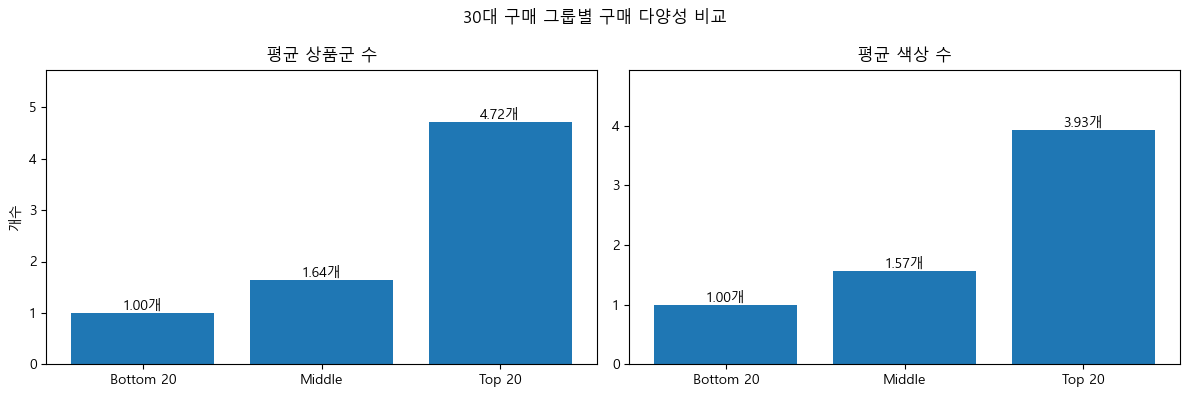

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

# 상품군 수 그래프
axes[0].bar(diversity_summary_30['Purchase_Group_30'], diversity_summary_30['Product_Type_Cnt_30'])
axes[0].set_title("평균 상품군 수")
axes[0].set_ylabel("개수")

# 색상 수 그래프
axes[1].bar(diversity_summary_30['Purchase_Group_30'], diversity_summary_30['Color_Cnt_30'])
axes[1].set_title("평균 색상 수")

# 공통 작업: 데이터 라벨에 '개' 추가
cols = ['Product_Type_Cnt_30', 'Color_Cnt_30']
for ax, col in zip(axes, cols):
    for i, v in enumerate(diversity_summary_30[col]):
        # f"{v:.2f}개" 로 수정하여 숫자 뒤에 단어 추가
        ax.text(i, v, f"{v:.2f}개", ha="center", va="bottom")

# y축 범위 조정
axes[0].set_ylim(0, diversity_summary_30['Product_Type_Cnt_30'].max() + 1)
axes[1].set_ylim(0, diversity_summary_30['Color_Cnt_30'].max() + 1)

plt.suptitle("30대 구매 그룹별 구매 다양성 비교")
plt.tight_layout()
plt.show()

##### 20대, 30대 모두에서 구매 상위 20% 고객은 특정 상품 반복 구매보다는 구매 다양성이 매우 높은 고객이 많다.